In [41]:
import stanza
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
with open ("/Users/abhinavshinow/Documents/GitHub/KG-Genaration-from-Biomedical-Text-Using-NER/Data_Collection/heart-data.txt","r") as f:
    text=f.read().replace("\n\n"," ").replace("\n"," ")
text=text[:100000]

In [4]:
# stanza.download('en', package='mimic', processors={'ner': 'i2b2'})

2021-11-06 18:15:07 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package |
-----------------------------
| tokenize        | mimic   |
| pos             | mimic   |
| lemma           | mimic   |
| depparse        | mimic   |
| ner             | i2b2    |
| backward_charlm | mimic   |
| forward_charlm  | mimic   |
| pretrain        | mimic   |

2021-11-06 18:23:44 INFO: Finished downloading models and saved to /Users/abhinavshinow/stanza_resources.


In [45]:
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

2021-12-10 16:40:37 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

2021-12-10 16:40:37 INFO: Use device: cpu
2021-12-10 16:40:37 INFO: Loading: tokenize
2021-12-10 16:40:38 INFO: Loading: pos
2021-12-10 16:40:38 INFO: Loading: lemma
2021-12-10 16:40:38 INFO: Loading: depparse
2021-12-10 16:40:38 INFO: Loading: ner
2021-12-10 16:40:39 INFO: Done loading processors!


In [46]:
doc=nlp(text)

In [47]:
for ent in doc.entities:
    print(ent.type)

PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
TEST
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
TEST
PROBLEM
PROBLEM
TREATMENT
PROBLEM
TREATMENT
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
TREATMENT
PROBLEM
PROBLEM
PROBLEM
TEST
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
TREATMENT
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
PROBLEM
T

In [48]:
for sent in doc.sentences:
    sent.print_dependencies()

('"', 9, 'punct')
('Cardiovascular', 3, 'compound')
('disease', 9, 'nsubj')
('(', 5, 'punct')
('CVD', 3, 'appos')
(')', 5, 'punct')
('is', 9, 'cop')
('a', 9, 'det')
('class', 0, 'root')
('of', 11, 'case')
('diseases', 9, 'nmod')
('that', 13, 'nsubj')
('involve', 11, 'acl:relcl')
('the', 15, 'det')
('heart', 13, 'obj')
('or', 18, 'cc')
('blood', 18, 'compound')
('vessels', 15, 'conj')
('.', 9, 'punct')
('CVD', 2, 'nsubj')
('includes', 0, 'root')
('coronary', 5, 'compound')
('artery', 5, 'compound')
('diseases', 2, 'obj')
('(', 7, 'punct')
('CAD', 5, 'appos')
(')', 7, 'punct')
('such', 11, 'case')
('as', 9, 'fixed')
('angina', 5, 'nmod')
('and', 14, 'cc')
('myocardial', 14, 'amod')
('infarction', 11, 'conj')
('(', 17, 'punct')
('commonly', 17, 'advmod')
('known', 11, 'acl')
('as', 21, 'case')
('a', 21, 'det')
('heart', 21, 'compound')
('attack', 17, 'obl')
(')', 17, 'punct')
('.', 2, 'punct')
('Other', 2, 'amod')
('CVDs', 3, 'nsubj')
('include', 0, 'root')
('stroke', 3, 'obj')
(',', 7, '

In [49]:
texts =[[]]
ners =[[]]
i=0
for sent in doc.ents:
    text=[]
    ner=[]
    for token in sent.tokens:
        text.append(token.text)
        ner.append(token.ner)
    texts.append(text)
    ners.append(ner)

In [50]:
ners

[[],
 ['B-PROBLEM', 'I-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],
 ['B-PROBLEM', 'E-PROBLEM'],
 ['S-PROBLEM'],
 ['B-PROBLEM', 'I-PROBLEM', 'E-

In [51]:
texts

[[],
 ['Cardiovascular', 'disease', '(', 'CVD'],
 ['diseases'],
 ['CVD'],
 ['coronary', 'artery', 'diseases'],
 ['CAD'],
 ['angina'],
 ['myocardial', 'infarction'],
 ['a', 'heart', 'attack', ')'],
 ['Other', 'CVDs'],
 ['stroke'],
 ['heart', 'failure'],
 ['hypertensive', 'heart', 'disease'],
 ['rheumatic', 'heart', 'disease'],
 ['cardiomyopathy'],
 ['abnormal', 'heart', 'rhythms'],
 ['congenital', 'heart', 'disease'],
 ['valvular', 'heart', 'disease'],
 ['carditis'],
 ['aortic', 'aneurysms'],
 ['peripheral', 'artery', 'disease'],
 ['thromboembolic', 'disease'],
 ['venous', 'thrombosis'],
 ['The', 'underlying', 'mechanisms'],
 ['the', 'disease'],
 ['Coronary', 'artery', 'disease'],
 ['stroke'],
 ['peripheral', 'artery', 'disease'],
 ['atherosclerosis'],
 ['high', 'blood', 'pressure'],
 ['diabetes', 'mellitus'],
 ['obesity'],
 ['high', 'blood', 'cholesterol'],
 ['High', 'blood', 'pressure'],
 ['CVD', 'deaths'],
 ['diabetes'],
 ['obesity'],
 ['Rheumatic', 'heart', 'disease'],
 ['untreated'

In [57]:
pattern = [['B-PROBLEM', 'I-PROBLEM', 'E-PROBLEM'],['B-TREATMENT', 'I-TREATMENT', 'E-TREATMENT'],['B-TEST', 'I-TEST', 'E-TEST']]
sources =[]
relations = []
targets =[]
for val in ners:
    if val in pattern:
        if texts[ners.index(val)][0] not in sources:
            sources.append(texts[ners.index(val)][0])
            relations.append(texts[ners.index(val)][1])
            targets.append(texts[ners.index(val)][2])    

In [53]:
df=pd.DataFrame({'source-node':sources,'target-node':targets,'relation':relations})

In [58]:
df['relation'].value_counts()[:50]

artery     201
glucose     66
blood       44
Name: relation, dtype: int64

In [55]:
df

,source-node,target-node,relation
0,coronary,diseases,artery
1,coronary,diseases,artery
2,coronary,diseases,artery
3,coronary,diseases,artery
4,coronary,diseases,artery
...,...,...,...
306,blood,control,glucose
307,blood,control,glucose
308,coronary,diseases,artery
309,blood,control,glucose


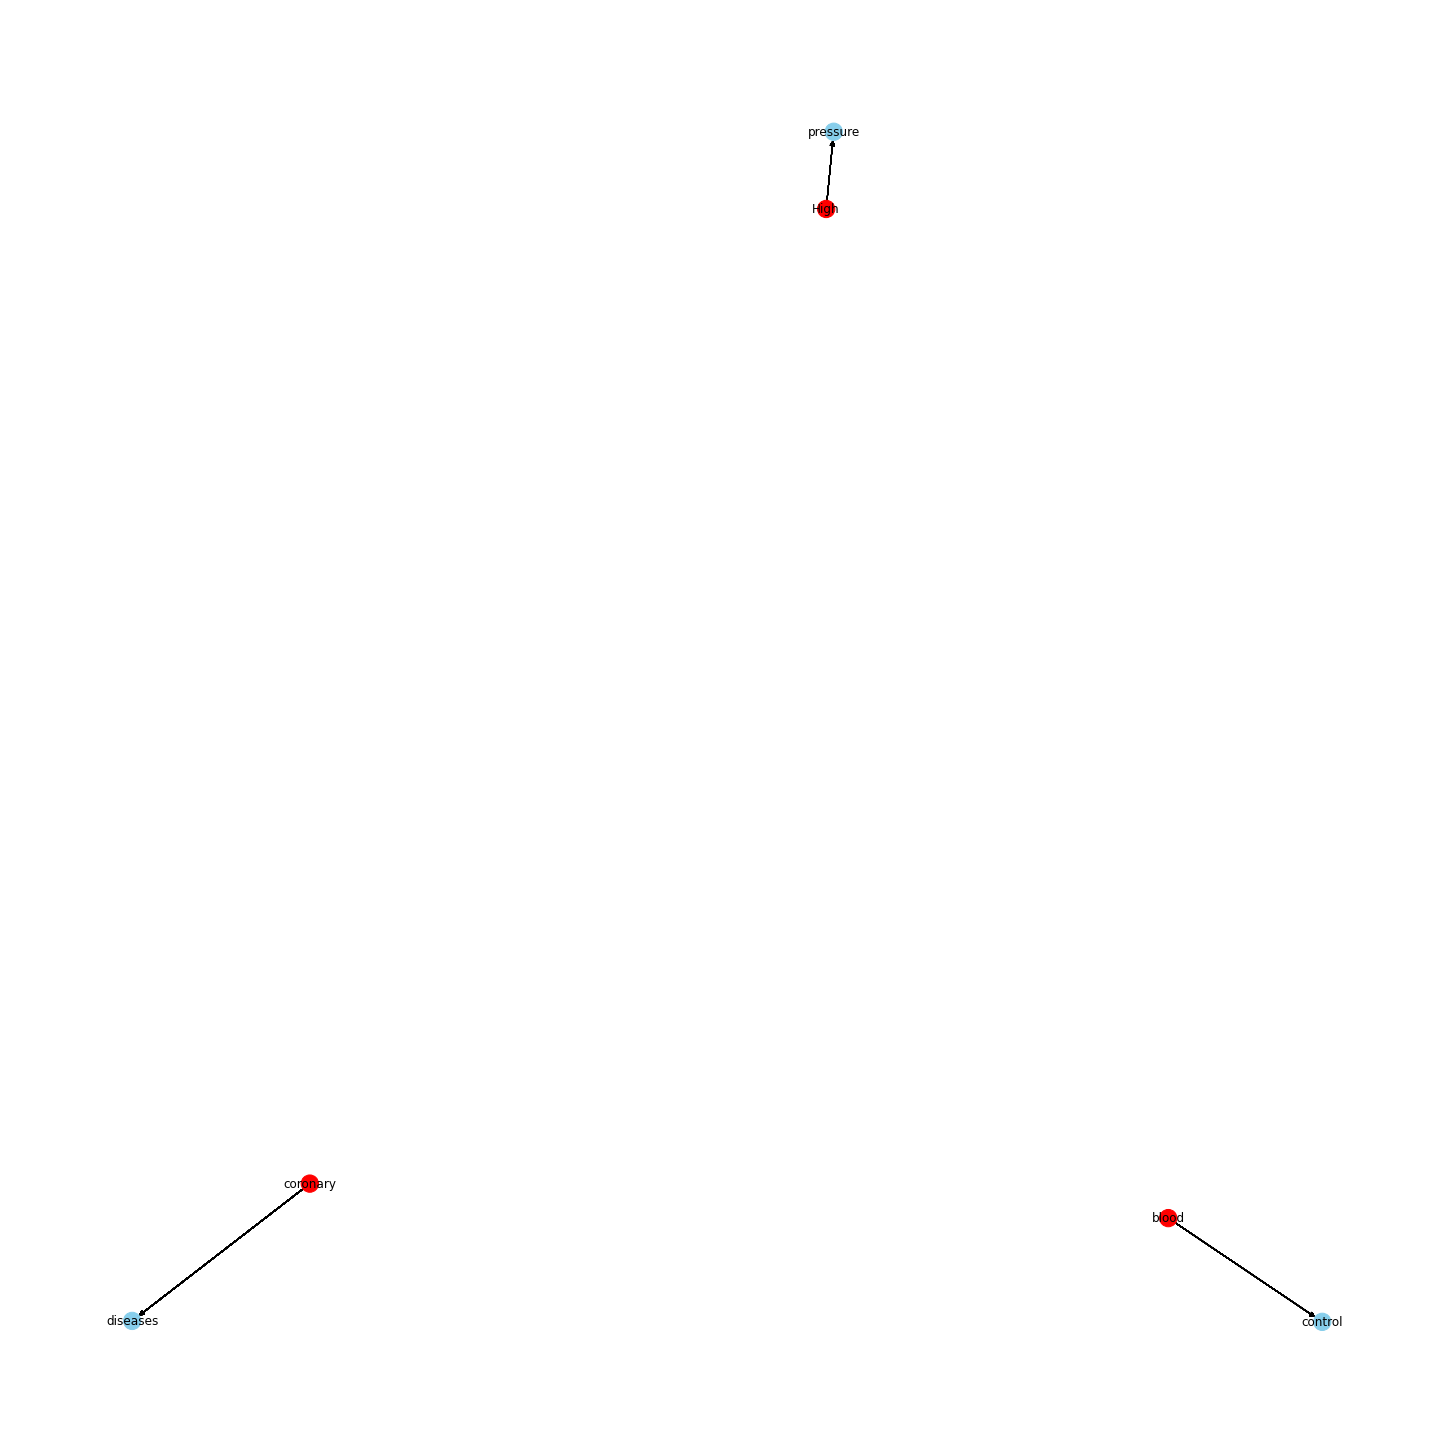

In [56]:
Knowledge_graph=nx.from_pandas_edgelist(df, 'source-node', 'target-node', edge_attr=True, create_using=nx.MultiDiGraph())
for n in Knowledge_graph.nodes():
    Knowledge_graph.nodes[n]['color'] = 'red' if n in sources else 'skyblue'

plt.figure(figsize=(20,20))
colors = [node[1]['color'] for node in Knowledge_graph.nodes(data=True)]
pos = nx.spring_layout(Knowledge_graph)
nx.draw(Knowledge_graph, with_labels=True, node_color=colors, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()